Read the dataset

Drop the columns which are unique for all users like IDs (2.5 points)
Distinguish the feature and target set (2.5 points)
 Divide the data set into Train and test sets
Normalize the train and test data (2.5 points)
 Initialize & build the model (10 points)
Optimize the model (5 points)
Predict the results using 0.5 as a threshold (5 points)
 Print the Accuracy score and confusion matrix (2.5 points)

In [143]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [77]:
df = pd.read_csv("bank.csv")

In [78]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [81]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
df.shape

(10000, 14)

In [83]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Drop the columns which are unique for all users like IDs (2.5 points)

In [84]:
df = df.drop(columns=["RowNumber", "CustomerId","Surname"])

In [85]:
df2 = pd.get_dummies(df,columns=["Geography","Gender"], prefix=["Geography_","Gender_"])

In [86]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain,Gender__Female,Gender__Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
# data = array(data)
# print(data)
# # one hot encode
# encoded = to_categorical(data)
# print(encoded)
# # invert encoding
# inverted = argmax(encoded[0])
# print(inverted)

Distinguish the feature and target set 

In [88]:
X = df2.drop(columns="Exited")

In [89]:
X.shape

(10000, 13)

In [90]:
y = df2["Exited"]

In [91]:
y.shape

(10000,)

 Divide the data set into Train and test sets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [93]:
X_train.shape

(7000, 13)

In [94]:
X_test.shape

(3000, 13)

In [95]:
y_train.shape

(7000,)

In [96]:
y_test.shape

(3000,)

In [97]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [98]:
y_train.shape


(7000, 2)

In [99]:
y_test.shape

(3000, 2)

Normalize the train and test data

 Initialize & build the model (10 points)
Optimize the model (5 points)
Predict the results using 0.5 as a threshold (5 points)
 Print the Accuracy score and confusion matrix (2.5 points)

In [101]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
# model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, input_shape = (13,)))

#Normalize the data 
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(2, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 84us/sample - loss: 0.5635 - acc: 0.7577 - val_loss: 0.5156 - val_acc: 0.7920
Epoch 2/50
7000/7000 [==============================] - 0s 51us/sample - loss: 0.5011 - acc: 0.7981 - val_loss: 0.5033 - val_acc: 0.7920
Epoch 3/50
7000/7000 [==============================] - 0s 39us/sample - loss: 0.4974 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 4/50
7000/7000 [==============================] - 0s 43us/sample - loss: 0.4974 - acc: 0.7981 - val_loss: 0.5026 - val_acc: 0.7920
Epoch 5/50
7000/7000 [==============================] - 0s 54us/sample - loss: 0.4980 - acc: 0.7981 - val_loss: 0.5031 - val_acc: 0.7920
Epoch 6/50
7000/7000 [==============================] - 0s 40us/sample - loss: 0.4978 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 7/50
7000/7000 [==============================] - 0s 39us/sample - loss: 0.4972 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 

In [107]:
# evaluate the model
scores1 = model.evaluate(X_test, y_test)
# scores2 = model2.evaluate(testX, testY2)
# scores3 = model3.evaluate(testX, testY2)


print("Score for model1 is {}".format(scores1[1]*100))
# print("Score for model2 is {}".format(scores2[1]*100))
# print("Score for model3 is {}".format(scores3[1]*100))

3000/3000 [==============================] - 0s 22us/sample - loss: 0.5023 - acc: 0.7920
Score for model1 is 79.19999957084656


In [109]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
# model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model2.add(tf.keras.layers.Dense(10, input_shape = (13,)))

model2.add(tf.keras.layers.Dense(20, activation = 'relu'))

#Normalize the data 
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(2, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 94us/sample - loss: 0.5708 - acc: 0.7457 - val_loss: 0.5545 - val_acc: 0.7787
Epoch 2/50
7000/7000 [==============================] - 0s 46us/sample - loss: 0.5003 - acc: 0.7981 - val_loss: 0.5045 - val_acc: 0.7920
Epoch 3/50
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4973 - acc: 0.7981 - val_loss: 0.5030 - val_acc: 0.7920
Epoch 4/50
7000/7000 [==============================] - 0s 47us/sample - loss: 0.4979 - acc: 0.7981 - val_loss: 0.5042 - val_acc: 0.7920
Epoch 5/50
7000/7000 [==============================] - 0s 54us/sample - loss: 0.4977 - acc: 0.7981 - val_loss: 0.5034 - val_acc: 0.7920
Epoch 6/50
7000/7000 [==============================] - 0s 59us/sample - loss: 0.4973 - acc: 0.7981 - val_loss: 0.5051 - val_acc: 0.7920
Epoch 7/50
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4983 - acc: 0.7979 - val_loss: 0.5026 - val_acc: 

In [111]:
# evaluate the model
# scores1 = model.evaluate(X_test, y_test)
scores2 = model2.evaluate(X_test, y_test)
# scores3 = model3.evaluate(testX, testY2)


# print("Score for model1 is {}".format(scores1[1]*100))
print("Score for model2 is {}".format(scores2[1]*100))
# print("Score for model3 is {}".format(scores3[1]*100))

3000/3000 [==============================] - 0s 27us/sample - loss: 0.5019 - acc: 0.7920
Score for model2 is 79.19999957084656


Train on 7000 samples, validate on 3000 samples
Epoch 1/500
7000/7000 [==============================] - 0s 50us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5026 - val_acc: 0.7920
Epoch 2/500
7000/7000 [==============================] - 0s 48us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5022 - val_acc: 0.7920
Epoch 3/500
7000/7000 [==============================] - 0s 47us/sample - loss: 0.4964 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 4/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5022 - val_acc: 0.7920
Epoch 5/500
7000/7000 [==============================] - 0s 46us/sample - loss: 0.4975 - acc: 0.7981 - val_loss: 0.5024 - val_acc: 0.7920
Epoch 6/500
7000/7000 [==============================] - 0s 47us/sample - loss: 0.4973 - acc: 0.7981 - val_loss: 0.5022 - val_acc: 0.7920
Epoch 7/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5023 - va

7000/7000 [==============================] - 0s 44us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5025 - val_acc: 0.7920
Epoch 60/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5032 - val_acc: 0.7920
Epoch 61/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4973 - acc: 0.7981 - val_loss: 0.5027 - val_acc: 0.7920
Epoch 62/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 63/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4969 - acc: 0.7981 - val_loss: 0.5027 - val_acc: 0.7920
Epoch 64/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5026 - val_acc: 0.7920
Epoch 65/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5025 - val_acc: 0.7920
Epoch 66/500
7000/7000 [================

Epoch 118/500
7000/7000 [==============================] - 0s 46us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5019 - val_acc: 0.7920
Epoch 119/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 120/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4964 - acc: 0.7981 - val_loss: 0.5022 - val_acc: 0.7920
Epoch 121/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 122/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4972 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 123/500
7000/7000 [==============================] - 0s 46us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5025 - val_acc: 0.7920
Epoch 124/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 125/500
7000/7

7000/7000 [==============================] - 0s 46us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5016 - val_acc: 0.7920
Epoch 177/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 178/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 179/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 180/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4964 - acc: 0.7981 - val_loss: 0.5024 - val_acc: 0.7920
Epoch 181/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5024 - val_acc: 0.7920
Epoch 182/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4969 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 183/500
7000/7000 [=========

7000/7000 [==============================] - 0s 45us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 235/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4969 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 236/500
7000/7000 [==============================] - 0s 44us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5020 - val_acc: 0.7920
Epoch 237/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5028 - val_acc: 0.7920
Epoch 238/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 239/500
7000/7000 [==============================] - 0s 46us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5019 - val_acc: 0.7920
Epoch 240/500
7000/7000 [==============================] - 0s 44us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5026 - val_acc: 0.7920
Epoch 241/500
7000/7000 [=========

7000/7000 [==============================] - 0s 45us/sample - loss: 0.4969 - acc: 0.7981 - val_loss: 0.5024 - val_acc: 0.7920
Epoch 293/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 294/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 295/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 296/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4965 - acc: 0.7981 - val_loss: 0.5019 - val_acc: 0.7920
Epoch 297/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 298/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 299/500
7000/7000 [=========

7000/7000 [==============================] - 0s 46us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5026 - val_acc: 0.7920
Epoch 351/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 352/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5025 - val_acc: 0.7920
Epoch 353/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 354/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4965 - acc: 0.7981 - val_loss: 0.5020 - val_acc: 0.7920
Epoch 355/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 356/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 357/500
7000/7000 [=========

7000/7000 [==============================] - 0s 45us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5020 - val_acc: 0.7920
Epoch 409/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4965 - acc: 0.7981 - val_loss: 0.5030 - val_acc: 0.7920
Epoch 410/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4973 - acc: 0.7981 - val_loss: 0.5023 - val_acc: 0.7920
Epoch 411/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4972 - acc: 0.7981 - val_loss: 0.5022 - val_acc: 0.7920
Epoch 412/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 413/500
7000/7000 [==============================] - 0s 46us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5020 - val_acc: 0.7920
Epoch 414/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4975 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 415/500
7000/7000 [=========

7000/7000 [==============================] - 0s 46us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5021 - val_acc: 0.7920
Epoch 467/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4968 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 468/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4971 - acc: 0.7981 - val_loss: 0.5017 - val_acc: 0.7920
Epoch 469/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4966 - acc: 0.7981 - val_loss: 0.5018 - val_acc: 0.7920
Epoch 470/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4970 - acc: 0.7981 - val_loss: 0.5025 - val_acc: 0.7920
Epoch 471/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4972 - acc: 0.7981 - val_loss: 0.5019 - val_acc: 0.7920
Epoch 472/500
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4967 - acc: 0.7981 - val_loss: 0.5024 - val_acc: 0.7920
Epoch 473/500
7000/7000 [=========

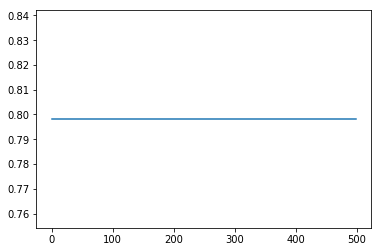

In [115]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32)
pyplot.plot(history.history['acc'])
pyplot.show()

In [118]:
predictions2 = model2.predict(X_test, batch_size=10, verbose=0)

In [119]:
for i in predictions2:
    print(i)

[0.7697016  0.23029843]
[0.85045904 0.14954104]
[0.8471605  0.15283945]
[0.77091056 0.22908941]
[0.737506   0.26249406]
[0.857911   0.14208905]
[0.7636635  0.23633653]
[0.8510565  0.14894347]
[0.85666156 0.14333843]
[0.84956354 0.15043645]
[0.75817204 0.24182792]
[0.78725433 0.21274567]
[0.85536385 0.1446361 ]
[0.8588684 0.1411316]
[0.80343074 0.19656928]
[0.7631996  0.23680033]
[0.7558995  0.24410056]
[0.75745064 0.24254934]
[0.76734275 0.23265718]
[0.78532696 0.21467309]
[0.757397   0.24260302]
[0.76258725 0.23741266]
[0.7712121  0.22878793]
[0.8530142 0.1469858]
[0.74700785 0.25299218]
[0.8546887  0.14531134]
[0.847832  0.1521679]
[0.8498104  0.15018952]
[0.79792684 0.20207317]
[0.861552   0.13844803]
[0.79057074 0.20942923]
[0.84946847 0.15053155]
[0.84861034 0.15138972]
[0.856895   0.14310497]
[0.7580424  0.24195755]
[0.76733035 0.23266968]
[0.7253343  0.27466568]
[0.7849416  0.21505842]
[0.7735307  0.22646934]
[0.7306493  0.26935068]
[0.85731643 0.14268355]
[0.8546627  0.14533725

[0.77063084 0.22936912]
[0.856384 0.143616]
[0.77547365 0.22452636]
[0.8031847  0.19681531]
[0.7676604  0.23233962]
[0.85331196 0.14668798]
[0.85109305 0.14890698]
[0.7673947  0.23260534]
[0.7633971  0.23660292]
[0.7336562  0.26634377]
[0.72720444 0.27279553]
[0.8532108  0.14678921]
[0.742018   0.25798208]
[0.7506774  0.24932265]
[0.7658107  0.23418927]
[0.85790545 0.14209451]
[0.7601789  0.23982108]
[0.74888134 0.25111866]
[0.8529756  0.14702445]
[0.85269976 0.14730027]
[0.8477151  0.15228486]
[0.85335857 0.14664143]
[0.85395575 0.14604427]
[0.75724626 0.24275379]
[0.85316056 0.14683948]
[0.7367257 0.2632743]
[0.7492121 0.2507879]
[0.79749435 0.20250563]
[0.8491105 0.1508895]
[0.8292698  0.17073025]
[0.7378952  0.26210475]
[0.7759703 0.2240297]
[0.8122546 0.1877454]
[0.76983577 0.23016423]
[0.86155474 0.13844527]
[0.84961385 0.15038614]
[0.75745285 0.24254712]
[0.78579503 0.21420495]
[0.85479677 0.14520328]
[0.76503855 0.23496144]
[0.7366009  0.26339915]
[0.7556891  0.24431093]
[0.754

[0.8015854  0.19841462]
[0.79655015 0.20344983]
[0.8591838 0.1408162]
[0.7620993  0.23790064]
[0.8474533  0.15254672]
[0.75861704 0.24138294]
[0.7821571  0.21784283]
[0.8619588 0.1380412]
[0.85606617 0.14393379]
[0.7522433  0.24775675]
[0.8609642  0.13903584]
[0.76176804 0.23823191]
[0.7931632 0.2068368]
[0.74024296 0.25975698]
[0.85184944 0.14815053]
[0.7799077  0.22009228]
[0.76070493 0.23929507]
[0.859196   0.14080402]
[0.80485755 0.19514242]
[0.8467245  0.15327549]
[0.7497326  0.25026748]
[0.78245014 0.21754986]
[0.8598853  0.14011471]
[0.85505354 0.14494646]
[0.8501909  0.14980915]
[0.85414183 0.14585821]
[0.7130433  0.28695676]
[0.8549687  0.14503118]
[0.7903687  0.20963128]
[0.8485443  0.15145566]
[0.85818636 0.14181358]
[0.76021063 0.23978934]
[0.7721117  0.22788826]
[0.73636615 0.26363382]
[0.8494807  0.15051931]
[0.7620007  0.23799933]
[0.7907919  0.20920804]
[0.8520856  0.14791444]
[0.7729121  0.22708793]
[0.85729    0.14270994]
[0.8541064  0.14589362]
[0.8615219  0.13847801

In [127]:
scaler = MinMaxScaler(feature_range=(0,1))

In [128]:
X_test_scaled = scaler.fit_transform(X_test)

/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [153]:
predictions2_rounded = model2.predict_classes(X_test_scaled)

In [135]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [141]:
y_predict=model2.predict_classes(X_test)

In [145]:
y_predict.shape

(3000,)

In [146]:
y_test.shape

(3000, 2)

In [148]:
metrics.accuracy_score(y_classes,y_predict)

0.792

In [151]:
cm = confusion_matrix(y_classes, y_predict)

In [152]:
cm

array([[2376,    0],
       [ 624,    0]])

In [154]:
metrics.accuracy_score(y_classes,predictions2_rounded)

0.7916666666666666

In [155]:
confusion_matrix(y_classes, predictions2_rounded)

array([[2372,    4],
       [ 621,    3]])